In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mglearn

     ------------------------------------ 581.4/581.4 kB 641.8 kB/s eta 0:00:00


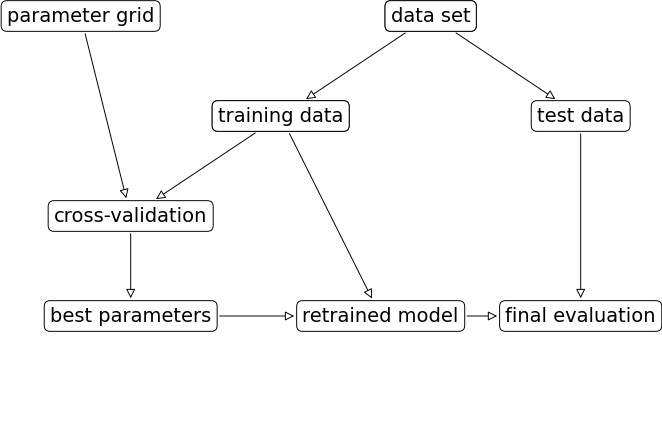

In [3]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [14]:
df = pd.read_csv('Activity_tracking_data.csv')

In [15]:
print(df.shape)


(358, 12)


In [16]:
df.head(10)

,Activity Type,Distance,Calories,Avg HR,Max HR,Aerobic TE,Total Reps,Total Sets,Elapsed Time (hours),Total Calories,Steps,Goal_Achieved
0,Calgary Walking,3.81,245,94,121,0.9,0,0,0.729,3666,11385,1
1,Calgary Hockey,11.93,1049,113,139,2.2,0,0,3.065,3666,11385,1
2,Calgary Walking,5.02,332,92,112,1.1,0,0,1.004,2379,7439,1
3,Strength,0.00,18,88,110,0.1,101,1,0.267,2382,4174,0
4,Strength,0.00,13,86,119,0.2,105,1,0.939,2382,4174,0
5,Strength,0.00,11,87,102,0.1,101,1,0.211,2382,4174,0
6,Calgary Running,3.16,227,151,171,2.9,0,0,0.281,2382,4174,0
7,Calgary Hockey,4.72,507,120,158,2.2,0,0,1.164,2886,3853,0
8,Calgary Hockey,4.78,422,116,156,2.2,0,0,0.976,2886,3853,0
9,Strength,0.00,105,94,121,0.4,301,1,0.810,2732,3514,0


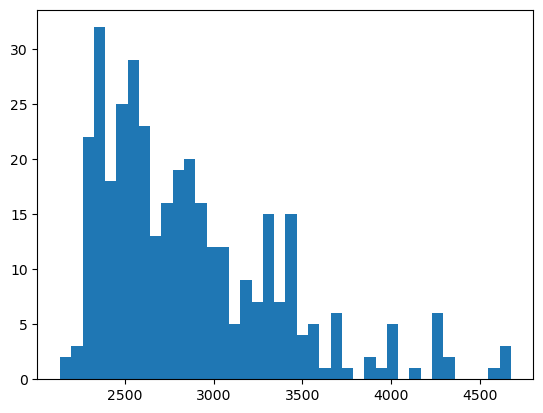

In [18]:
plt.hist(df['Total Calories'], bins = 40)
plt.show()

In [21]:
feature_matrix = df.iloc[:,0:11].drop(['Steps'], axis=1) 
feature_matrix.head()

,Activity Type,Distance,Calories,Avg HR,Max HR,Aerobic TE,Total Reps,Total Sets,Elapsed Time (hours),Total Calories
0,Calgary Walking,3.81,245,94,121,0.9,0,0,0.729,3666
1,Calgary Hockey,11.93,1049,113,139,2.2,0,0,3.065,3666
2,Calgary Walking,5.02,332,92,112,1.1,0,0,1.004,2379
3,Strength,0.00,18,88,110,0.1,101,1,0.267,2382
4,Strength,0.00,13,86,119,0.2,105,1,0.939,2382


In [22]:
target_vector = df.iloc[:,-1]
target_vector.head(10)

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Goal_Achieved, dtype: int64

In [23]:
feature_matrix['Activity Type'].describe()

count          358
unique          13
top       Strength
freq            95
Name: Activity Type, dtype: object

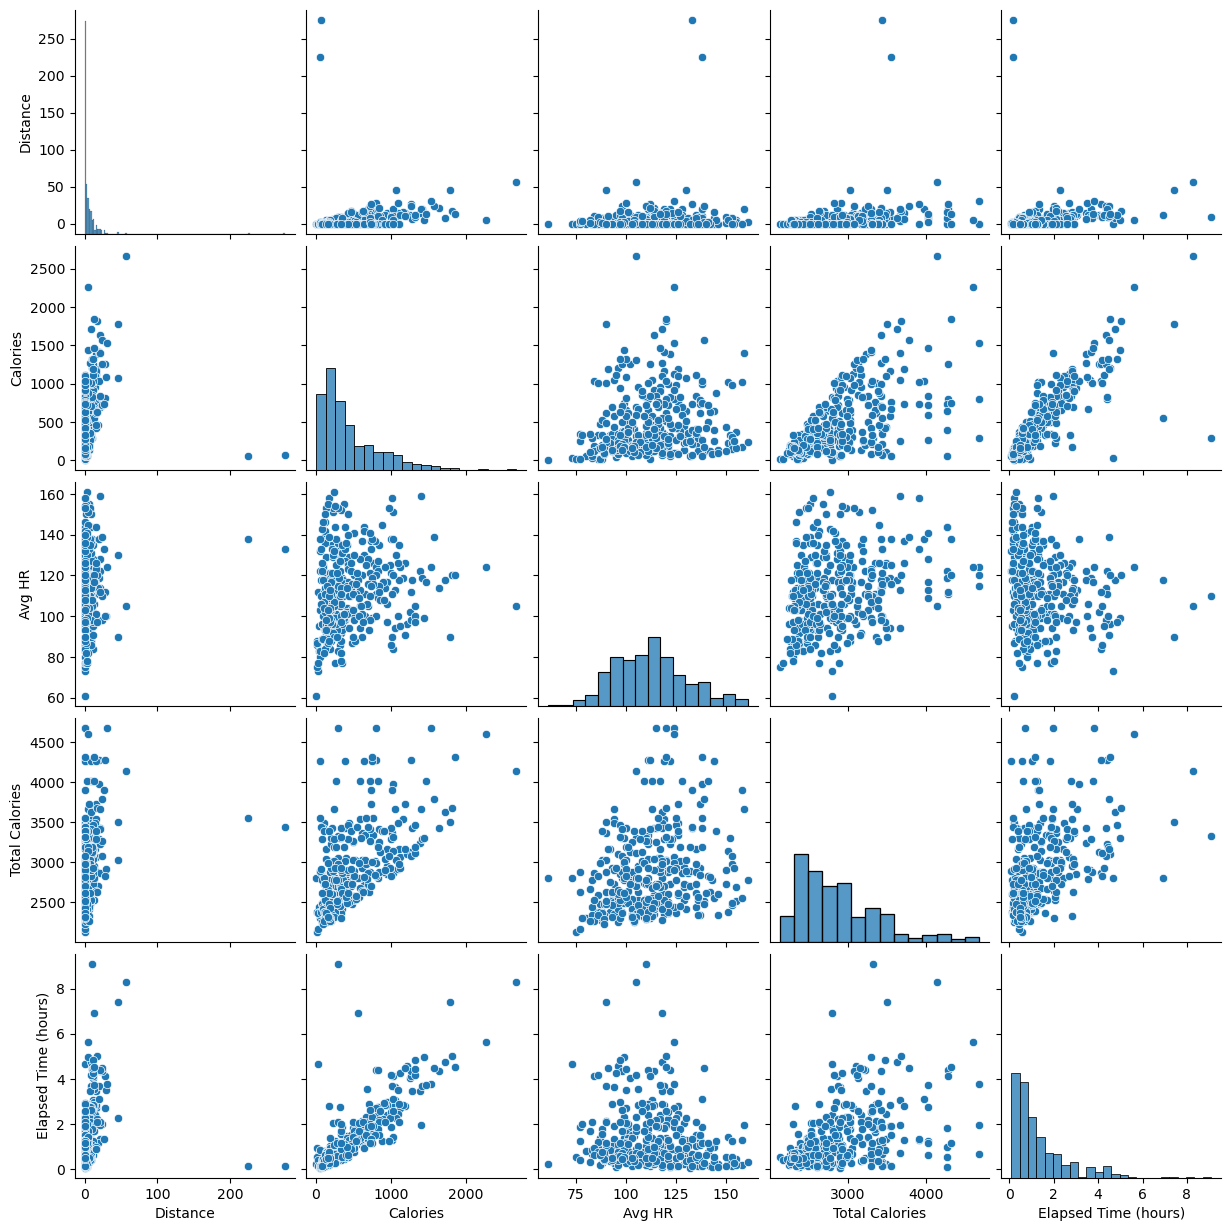

In [5]:
sns.pairplot(df[['Distance', 'Calories', 'Avg HR', 'Total Calories', 'Elapsed Time (hours)']])
plt.show()

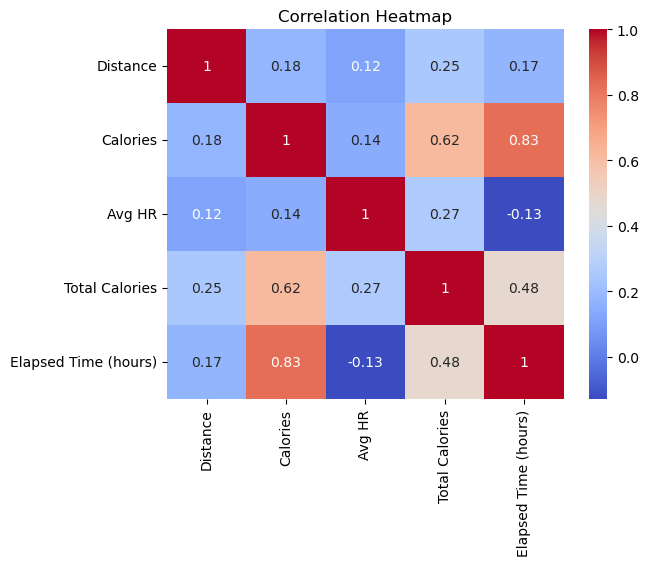

In [6]:
correlation_matrix = df[['Distance', 'Calories', 'Avg HR', 'Total Calories', 'Elapsed Time (hours)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
calorie_bins = [0, 100, 200, 300, 400, 500, 600, float('inf')]
df['Calorie_Bins'] = pd.cut(df['Calories'], bins=calorie_bins, labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '600+'])


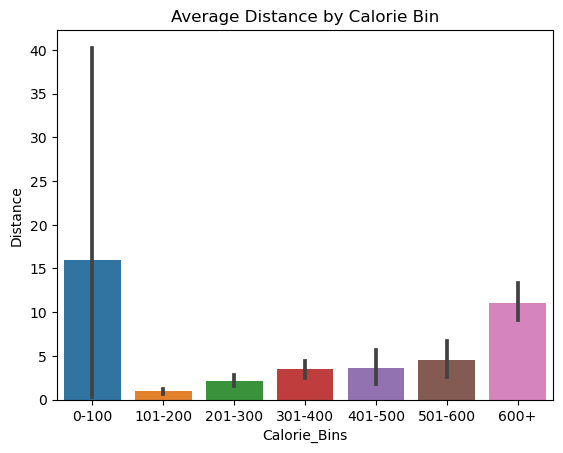

In [10]:
# Average Distance by Calorie Bin
sns.barplot(x='Calorie_Bins', y='Distance', data=df)
plt.title('Average Distance by Calorie Bin')
plt.show()


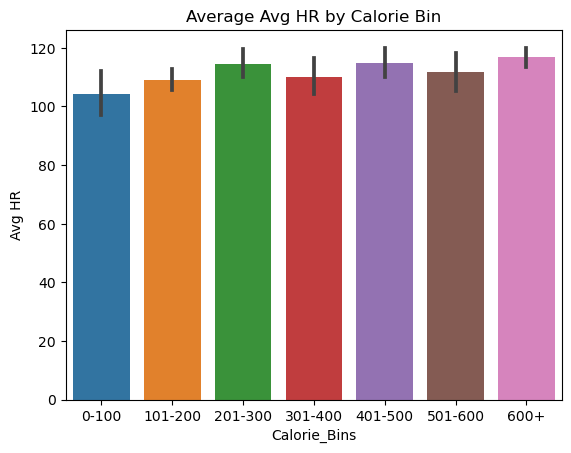

In [11]:
# Average Avg HR by Calorie Bin
sns.barplot(x='Calorie_Bins', y='Avg HR', data=df)
plt.title('Average Avg HR by Calorie Bin')
plt.show()


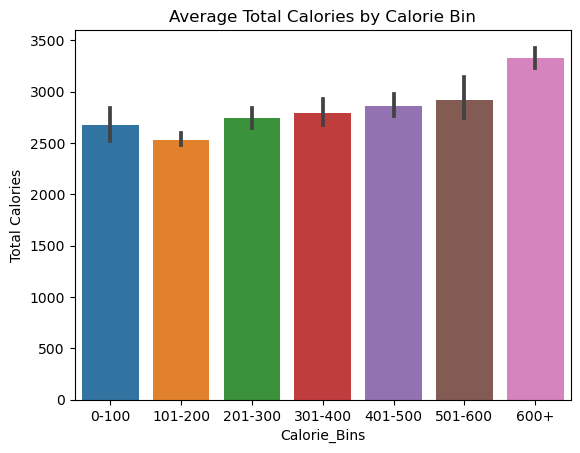

In [12]:
# Average Total Calories by Calorie Bin
sns.barplot(x='Calorie_Bins', y='Total Calories', data=df)
plt.title('Average Total Calories by Calorie Bin')
plt.show()


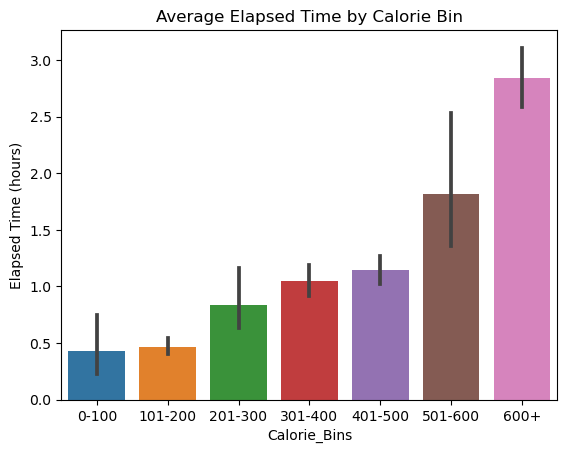

In [13]:
# Average Elapsed Time by Calorie Bin
sns.barplot(x='Calorie_Bins', y='Elapsed Time (hours)', data=df)
plt.title('Average Elapsed Time by Calorie Bin')
plt.show()


<AxesSubplot:>

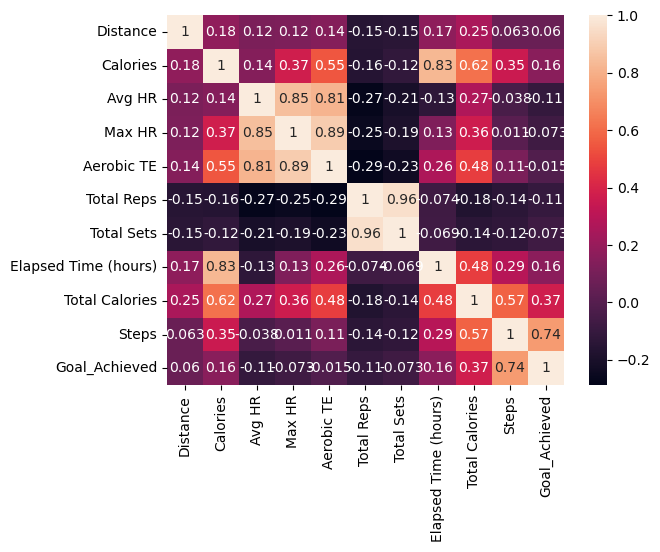

In [26]:
sns.heatmap(df.corr(),annot=True)

In [28]:
d1 = df.describe()
display(d1)

,Distance,Calories,Avg HR,Max HR,Aerobic TE,Total Reps,Total Sets,Elapsed Time (hours),Total Calories,Steps,Goal_Achieved
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,5.905503,456.226257,112.371508,147.363128,1.583520,72.153631,5.505587,1.350860,2868.639665,6774.067039,0.469274
std,19.810967,408.489081,18.112594,20.762010,0.985572,140.008969,11.260039,1.353027,508.156300,4593.625385,0.499753
min,0.000000,6.000000,61.000000,88.000000,0.000000,0.000000,0.000000,0.082000,2135.000000,566.000000,0.000000
25%,0.000000,167.250000,99.000000,133.000000,0.700000,0.000000,0.000000,0.459500,2487.500000,3553.250000,0.000000
50%,1.690000,320.000000,111.000000,147.000000,1.400000,0.000000,0.000000,0.895000,2732.000000,5451.000000,0.000000
75%,6.637500,638.500000,122.000000,162.000000,2.300000,98.500000,1.000000,1.818250,3163.750000,8586.250000,1.000000
max,275.000000,2666.000000,161.000000,195.000000,5.000000,757.000000,54.000000,9.093000,4675.000000,27680.000000,1.000000


In [29]:
df.columns

Index(['Activity Type', 'Distance', 'Calories', 'Avg HR', 'Max HR',
       'Aerobic TE', 'Total Reps', 'Total Sets', 'Elapsed Time (hours)',
       'Total Calories', 'Steps', 'Goal_Achieved'],
      dtype='object')

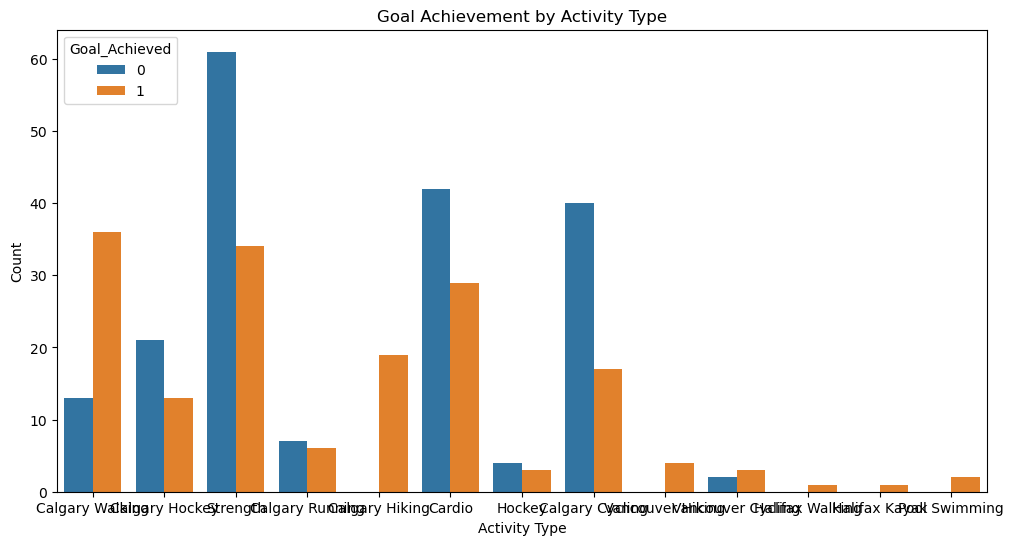

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity Type', hue='Goal_Achieved', data=df)
plt.title('Goal Achievement by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

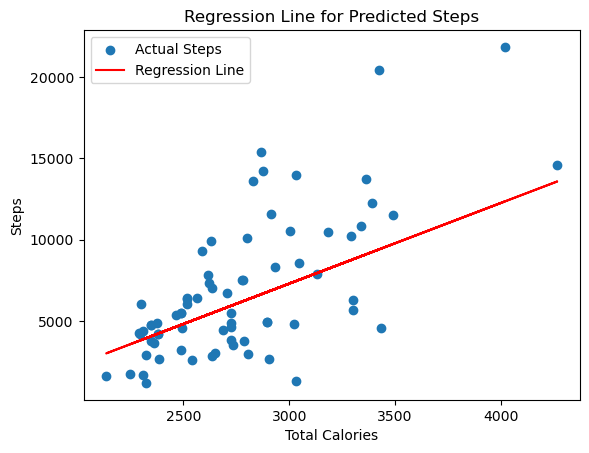

In [39]:
X = df[['Distance', 'Calories', 'Avg HR', 'Total Reps', 'Total Sets', 'Elapsed Time (hours)', 'Total Calories']]
y = df['Steps']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train[['Total Calories']], y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test[['Total Calories']])



# Visualize actual vs predicted values with regression line
plt.scatter(X_test['Total Calories'], y_test, label='Actual Steps')
plt.plot(X_test['Total Calories'], y_pred, color='red', label='Regression Line')
plt.xlabel('Total Calories')
plt.ylabel('Steps')
plt.title('Regression Line for Predicted Steps')
plt.legend()
plt.show()

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10935513.08925867


In [38]:
# Calculate the accuracy level (R^2 score) of the model
accuracy = model.score(X_test[['Total Calories']], y_test)
print(f'Model Accuracy: {accuracy:.2%}')

Model Accuracy: 40.24%
